In [1]:
from sklearn.datasets import load_boston  # 波士顿房价
from sklearn.linear_model import LinearRegression  # 正规方程解
from sklearn.linear_model import SGDRegressor  # 随机梯度下降线性回归
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# 设置字体
plt.rcParams["font.sans-serif"] = "SimHei"
# 默认可以显示负号，增加字体显示后。需对负号正常显示进行设置
plt.rcParams['axes.unicode_minus'] = False

In [3]:
boston = load_boston()
print("数据集keys", boston.keys())

数据集keys dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X, y = boston.data, boston.target  # 特征和标签

In [10]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    # stratify=y,  # 回归类问题，没有分层参数
                                                    )

In [11]:
# 先拆分数据集 后标准化
std = StandardScaler()
std.fit(X_train)  # 使用训练集进行拟合【计算标准化和均值】
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [12]:
# lr = LinearRegression()
lr = SGDRegressor()

In [13]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)  # 测试集进行预测

In [14]:
# 系数
# print("系数", lr.coef_)
# print("截距", lr.intercept_)
# print("特征名称", boston.feature_names)
#
# print("房价=", end='')
# for i, j in zip(boston.feature_names, lr.coef_):
#     print("{}*{} + ".format(i, j), end=" ")
# print(lr.intercept_)

# 系数最大是RM:房子的平均屋子数
# 系数最小的NOX(负最大) 该值越大 房子越便宜，一氧化氮含量

# 看效果是否好
# 计算真实值和预测值之间的误差
# 评估方法：均方误差 MSE、均方根误差RMSE、平均绝对误差MAE、R2
# lr.score(X_test, y_test)

print("均方误差", mean_squared_error(y_test, y_pred))
print("均方根误差RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("平均绝对误差MAE", mean_absolute_error(y_test, y_pred))
print("R2", lr.score(X_test,y_test))

均方误差 23.517114005092196
均方根误差RMSE 4.849444711004776
平均绝对误差MAE 3.747293510388026
R2 0.76203849831245


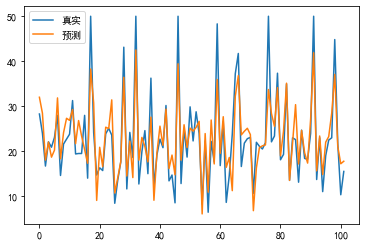

In [15]:
# 可视化
# 以样本编号为x轴；真实结果作为y轴
x_data = np.arange(len(X_test))
plt.plot(x_data, y_test)  # 真实结果
plt.plot(x_data, y_pred)  #预测结果

plt.legend(["真实", "预测"])

plt.show()